In [1]:
from util import get_bug_reports, initialize_mongo, read_pickle
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [2]:
mongo = initialize_mongo("archs")
TF_IDF = read_pickle('../vectors/tf-idf.pkl')
T5 = read_pickle('../vectors/t5.pkl')
BUG_REPORTS = {br['id']: br for br in get_bug_reports()}

In [3]:
def is_sorted(lst, key='similarity_files'):
    return all(lst[i][key] <= lst[i + 1][key] for i in range(len(lst) - 1))

similars = list(mongo.find({"similarity_files": {"$gte": 0.5}}))
print(is_sorted(similars))

True


In [6]:
similars = list(mongo.find({"similarity_files": {"$gte": 0.5}}))
n_similars = len(similars)
n_similars

35167

In [13]:
TF_IDF[1]

{'id': 1,
 'summary': {'tokens': <1x9246 sparse matrix of type '<class 'numpy.float64'>'
  	with 6 stored elements in Compressed Sparse Row format>,
  'without_stopwords': <1x9142 sparse matrix of type '<class 'numpy.float64'>'
  	with 5 stored elements in Compressed Sparse Row format>,
  'lemmatized': <1x8546 sparse matrix of type '<class 'numpy.float64'>'
  	with 5 stored elements in Compressed Sparse Row format>},
 'description': {'tokens': <1x57747 sparse matrix of type '<class 'numpy.float64'>'
  	with 166 stored elements in Compressed Sparse Row format>,
  'without_stopwords': <1x57624 sparse matrix of type '<class 'numpy.float64'>'
  	with 125 stored elements in Compressed Sparse Row format>,
  'lemmatized': <1x56492 sparse matrix of type '<class 'numpy.float64'>'
  	with 121 stored elements in Compressed Sparse Row format>}}

In [12]:
list(TF_IDF[1]['summary']['tokens'].toarray()[0])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [4]:
T5[1]

{'id': 459246,
 'summary': array([ 1.92508530e-02, -3.96551751e-02,  4.12103580e-03,  3.48875634e-02,
         5.22957332e-02, -2.33273730e-02, -2.74400605e-04, -5.11017926e-02,
         4.81435889e-03, -5.92959113e-02, -2.44201254e-02,  3.65903787e-02,
        -1.35150673e-02,  4.35823612e-02, -1.45655693e-02,  7.24713206e-02,
        -3.18228413e-04,  2.01438032e-02, -1.69647429e-02,  4.33645435e-02,
        -1.16522731e-02,  4.83935364e-02,  3.22371162e-02, -1.25645399e-02,
        -1.41559280e-02, -2.28103884e-02,  6.52080588e-03, -1.76072270e-02,
         1.99245997e-02,  4.20543505e-03,  1.83019545e-02, -3.74138616e-02,
         1.18479067e-02, -9.09051218e-04,  4.82635014e-02,  5.31233214e-02,
         1.35888241e-03, -8.36065225e-03,  6.25578463e-02, -3.04589979e-02,
        -9.80027299e-03, -9.09447297e-03, -3.04027908e-02, -5.47157861e-02,
         5.03576845e-02, -3.46694927e-04,  2.83698011e-02,  2.20570806e-02,
         7.53516108e-02, -1.22925900e-02,  2.66395193e-02,  1.

In [13]:
for emb in T5:
    if len(emb['description']) != 768:
        print(emb['description'])

In [43]:
maxi = 0
for id in list(TF_IDF.keys()):
    new_max = max(TF_IDF[id]['summary']['tokens'].toarray()[0])
    if maxi < new_max:
        maxi =new_max
        
print(maxi)


1.0


In [41]:
max = 0
for 
max()

0.5591759335841909

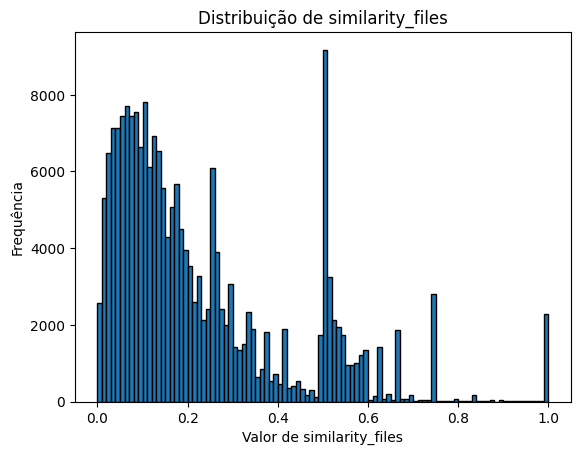

In [ ]:
valores_similarity = [d["similarity_files"] for d in test]
# Plotar o histograma
plt.hist(valores_similarity, bins=100, edgecolor='black')
plt.title('Distribuição de similarity_files')
plt.xlabel('Valor de similarity_files')
plt.ylabel('Frequência')
plt.show()

In [1]:
similars = list(mongo.find({"similarity_files": {"$gte": 0.5}}))
len(similars)

NameError: name 'mongo' is not defined

In [44]:
mongo.find_one()

{'_id': ObjectId('65539eb87164bde8bfd2762d'),
 'bug_report_1': 459991,
 'bug_report_2': 479327,
 'similarity_product': 0,
 'similarity_component': 0,
 'similarity_op_sys': 1,
 'distance_severity': 0,
 'distance_priority': 0,
 'similarity_t5_summary': 0.6407034397125244,
 'similarity_t5_description': 0.6741763353347778,
 'similarity_tf_idf_summary_tokens': 0.0,
 'similarity_tf_idf_summary_without_stopwords': 0.0,
 'similarity_tf_idf_summary_lemmatized': 0.0,
 'similarity_tf_idf_description_tokens': 0.05349853743282809,
 'similarity_tf_idf_description_without_stopwords': 0.0,
 'similarity_tf_idf_description_lemmatized': 0.0,
 'similarity_repositories': 0.0,
 'similarity_files': 0.0}

In [ ]:
def request_not_similars(num_requests):
    not_similars = []
    gap = 0.5 / num_requests
    
    for i in range(num_requests):
        lower_bound = i * gap
        upper_bound = lower_bound + gap
        not_similars_request = list(mongo.find({"similarity_files": {"$gte": lower_bound, "$lt": upper_bound}}).limit(7))
        not_similars.append(not_similars_request)
        
    return not_similars

not_similars = [elemento for sublista in request_not_similars(10000) for elemento in sublista]
len(not_similars)

35247

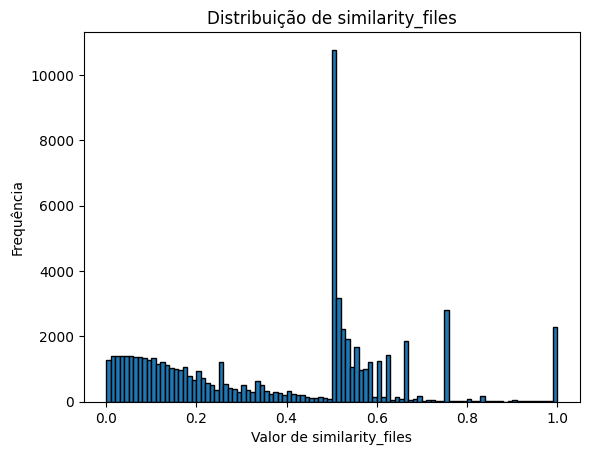

In [ ]:
valores_similarity = [d["similarity_files"] for d in similars + not_similars]

# Plotar o histograma
plt.hist(valores_similarity, bins=100, edgecolor='black')
plt.title('Distribuição de similarity_files')
plt.xlabel('Valor de similarity_files')
plt.ylabel('Frequência')
plt.show()

In [29]:
from util import initialize_mongo, read_pickle
import tensorflow as tf
import numpy as np
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from scipy.sparse import vstack

mongo = initialize_mongo("archs")
TF_IDF = read_pickle('../vectors/tf-idf.pkl')
total_archs = 52547541
epochs = 10
page_size = 10000
max_size = 57747

def pad_and_flatten(matrix, max_size):
    padding = np.zeros((1, max_size - matrix.shape[1]))
    padded = np.hstack([matrix.toarray(), padding])
    return padded.flatten()

def adjust_features(document):
    features_list = [
        "distance_severity",
        "distance_priority",
        "similarity_op_sys",
        "similarity_component",
        "similarity_product"
    ]

    features = [document[feature] for feature in features_list]

    # Converte as matrizes esparsas para arrays densos e adiciona os tokens summary e description do bug_report_1
    features.append(TF_IDF[document["bug_report_1"]]['summary']['tokens'])
    features.append(TF_IDF[document["bug_report_1"]]['description']['tokens'])

    # Converte as matrizes esparsas para arrays densos e adiciona os tokens summary e description do bug_report_2
    features.append(TF_IDF[document["bug_report_2"]]['summary']['tokens'])
    features.append(TF_IDF[document["bug_report_2"]]['description']['tokens'])


    return [item for sublist in features for item in np.array(sublist).flat]


# Métrica F1 para regressão
def f1_metric(y_true, y_pred):
    threshold = 0.5 
    y_pred = tf.cast(tf.math.greater_equal(y_pred, threshold), dtype=tf.float32)
    return f1_score(y_true, y_pred, average='weighted')

def separate_features_labels(documents):
    features = []
    labels = []
    for document in documents:
        labels.append(document['similarity_files'])
        features.append(adjust_features(document))
        
    return (np.array(features), np.array(labels))
        
# Modelo
model = tf.keras.models.Sequential([
    layers.BatchNormalization(input_shape=(9,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Compilação do Modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[f1_metric])

# Treinamento
for epoch in range(epochs):
    archs_processed = 0
    val_data = []
    while(archs_processed < total_archs):
        train, val = train_test_split([doc for doc in mongo.find().skip(archs_processed).limit(page_size)], test_size=0.2, random_state=42)
        val_data += val
        
        features, labels = separate_features_labels(train)
        model.train_on_batch(features, labels)
        print(f'Foram separados {archs_processed}/{total_archs} na época {epoch+1}')

    val_features, val_labels = separate_features_labels(val_data)
    val_loss, val_f1 = model.evaluate(val_features, val_labels, verbose=0)

    print(f'Epoch {epoch+1}/{epochs}, Val Loss: {val_loss:.4f}, Val F1: {val_f1:.4f}')
    
model.save("modelo_final.h5")
print("Modelo salvo com sucesso!")


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.int32).

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Defina o intervalo desejado
intervalo_inicio = 10
intervalo_fim = 100

# Gere 50 valores aleatórios dentro do intervalo
valores_aleatorios = np.random.uniform(intervalo_inicio, intervalo_fim, 50)

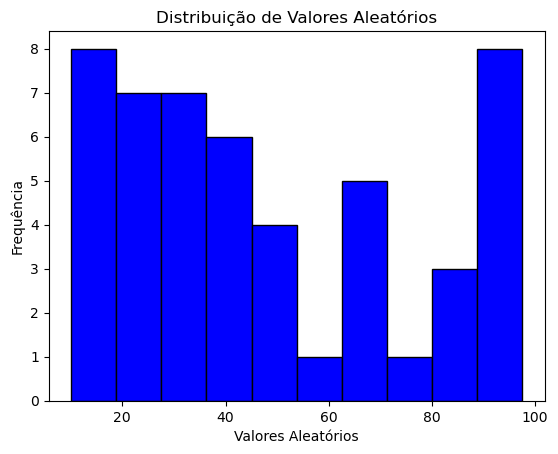

In [27]:
plt.hist(valores_aleatorios, bins=10, color='blue', edgecolor='black')

# Adicione rótulos e título
plt.xlabel('Valores Aleatórios')
plt.ylabel('Frequência')
plt.title('Distribuição de Valores Aleatórios')

# Exiba o gráfico
plt.show()

In [29]:
# Crie um DataFrame com os valores aleatórios
df = pd.DataFrame({'Grade': valores_aleatorios})

# Defina o número desejado de intervalos (bins)
num_intervalos = 10

# Crie intervalos (faixas) para representar os grupos
df['Grade_Group'] = pd.cut(df['Grade'], bins=num_intervalos, labels=False)

# Exiba a distribuição dos dados nos intervalos
print(df['Grade_Group'].value_counts())

# Realize a amostragem aleatória estratificada
amostra_estratificada = df.groupby('Grade_Group', group_keys=False).apply(lambda x: x.sample(frac=0.7))

# Exiba a amostra resultante
print(amostra_estratificada)

Grade_Group
9    8
0    8
2    7
1    7
3    6
6    5
4    4
8    3
7    1
5    1
Name: count, dtype: int64
        Grade  Grade_Group
23  13.929264            0
33  11.645917            0
42  17.767408            0
20  11.033258            0
11  12.143786            0
9   10.088903            0
44  18.984517            1
15  19.613582            1
24  23.846624            1
18  22.036538            1
37  20.594726            1
22  27.658598            2
39  33.602936            2
10  30.909833            2
32  36.136045            2
29  28.814816            2
5   40.708406            3
36  43.071511            3
31  37.626965            3
43  40.183582            3
12  47.625734            4
30  49.282865            4
2   49.615317            4
41  62.090292            5
40  64.308309            6
16  62.743881            6
13  67.085832            6
47  70.578188            6
1   76.041958            7
45  88.108855            8
26  83.515427            8
49  90.963075            9
4

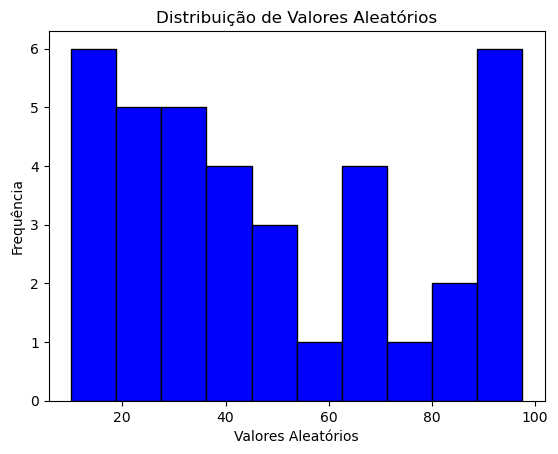

In [30]:
plt.hist(amostra_estratificada['Grade'], bins=10, color='blue', edgecolor='black')

# Adicione rótulos e título
plt.xlabel('Valores Aleatórios')
plt.ylabel('Frequência')
plt.title('Distribuição de Valores Aleatórios')

# Exiba o gráfico
plt.show()

In [34]:
from util import initialize_mongo
mongo = initialize_mongo("archs")

In [38]:
arches = mongo.find({"similarity_files": {"$lt": 0.5}}, {"similarity_files": 1, "_id": 0})

In [39]:
for arch in arches:
    print(arch)
    break

KeyboardInterrupt: 

In [36]:
test = [arch for arch in arches]

ServerSelectionTimeoutError: localhost:27017: [WinError 10061] Nenhuma conexão pôde ser feita porque a máquina de destino as recusou ativamente (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms), Timeout: 30s, Topology Description: <TopologyDescription id: 659c593eeb8a46cea86487c6, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [WinError 10061] Nenhuma conexão pôde ser feita porque a máquina de destino as recusou ativamente (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')>]>

In [19]:
from util import initialize_mongo, save_to_pickle
import pandas as pd
import random

BATCH_SIZE = 5000
MONGO = initialize_mongo("archs_without_test")
PATH = '../data/subsample/'

def request_to_mongo(is_balanced):
    if is_balanced:
        not_similars = {'similarity_files': [], '_id': []}
        similars = {'similarity_files': [], '_id': []}

        for arch in MONGO.find({"similarity_files": {"$gte": 0}}, {"similarity_files": 1, "_id": 1}):
            if arch["similarity_files"] < 0.5:
                not_similars['similarity_files'].append(arch['similarity_files'])
                not_similars['_id'].append(arch['_id'])
            else:
                similars['similarity_files'].append(arch['similarity_files'])
                similars['_id'].append(arch['_id'])
                
        data = (not_similars, similars)
    else:
        data = {'similarity_files': [], '_id': []}
        for arch in MONGO.find({"similarity_files": {"$gte": 0}}, {"similarity_files": 1, "_id": 1}):
            data['similarity_files'].append(arch['similarity_files'])
            data['_id'].append(arch['_id'])
        
    print(f'Dataset Builded')
    return data

def make_df(dataset):
    df = pd.DataFrame(dataset)
    df['Group'] = pd.cut(df['similarity_files'], bins=1000, labels=False)
    return df

def stratify_data(frac, df):
    return df.groupby('Group', group_keys=False).apply(lambda x: x.sample(frac=frac))
    
def stratify_data_with_rest(frac, df):
    data_stratified = stratify_data(frac, df)
    data_rest = df.drop(data_stratified.index)
    return data_stratified, data_rest

def get_mongo_data_and_save(data, split):
    data = list(data)
    random.shuffle(data)
    for batch_num, batch in enumerate(range(0, len(data), BATCH_SIZE)):
        current_batch = data[batch:batch + BATCH_SIZE]
        to_save = list(MONGO.find({"_id": {"$in": current_batch}}))
        save_to_pickle(to_save, f'{PATH}/{split}/batch_{batch_num}')
        print(f"Batch {batch_num} of {split} created")

In [4]:
data = request_to_mongo(True)
    
PATH += '/balanced/'
not_similars, similars = data
df = make_df(not_similars)

Dataset Builded


In [5]:
num_similars, num_not_similars = len(similars['similarity_files']), len(not_similars['similarity_files'])

stratified_not_similars = stratify_data(num_similars/num_not_similars, df)

In [6]:
not_similars_train, not_similars_val = stratify_data_with_rest(0.8, stratified_not_similars)


In [7]:
df = make_df(similars)

In [8]:
similars_train, similars_val = stratify_data_with_rest(0.8, df)

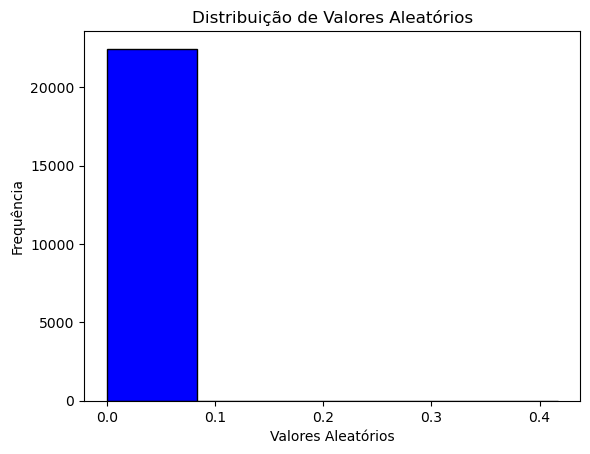

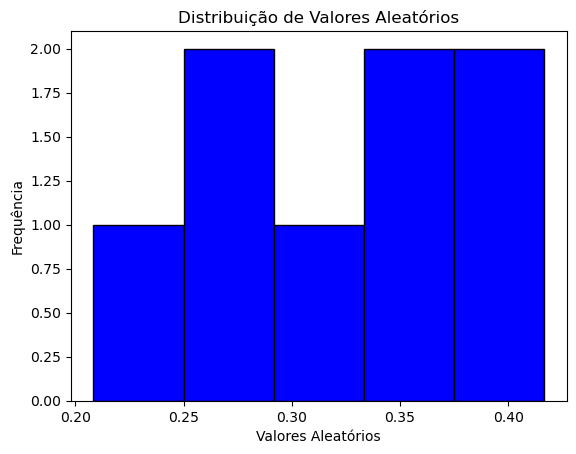

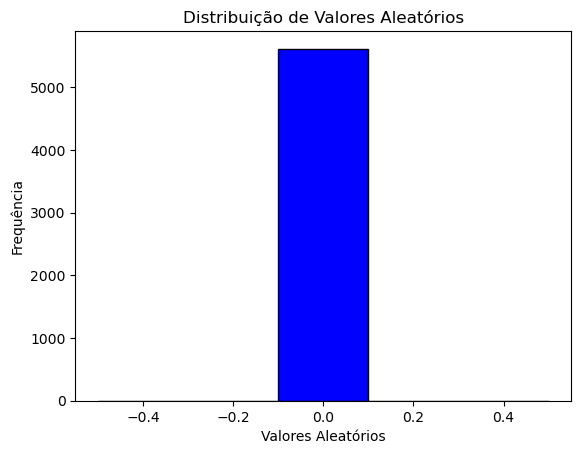

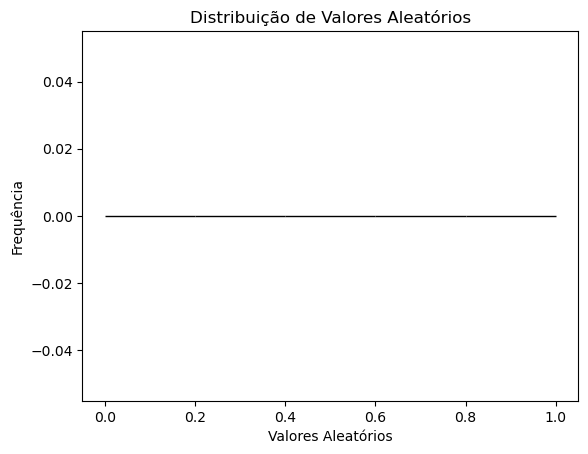

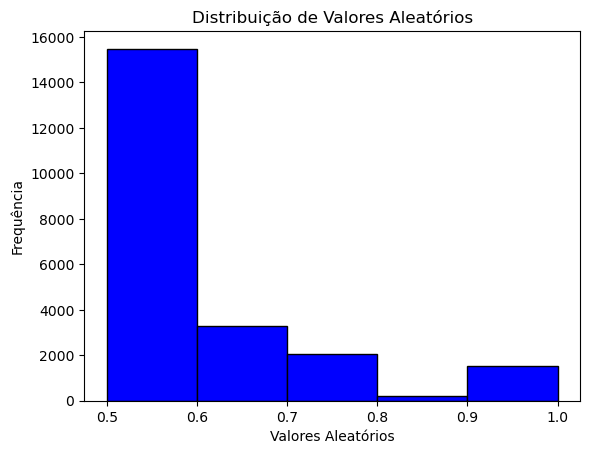

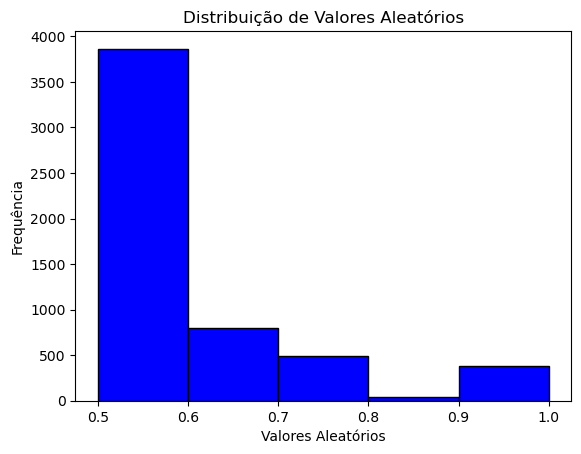

In [15]:
import matplotlib.pyplot as plt

def plot_histogram(data):
    # Crie um histograma
    plt.hist(data, bins=5, color='blue', edgecolor='black')

    # Adicione rótulos e título
    plt.xlabel('Valores Aleatórios')
    plt.ylabel('Frequência')
    plt.title('Distribuição de Valores Aleatórios')

    # Exiba o gráfico
    plt.show()
    
plot_histogram(not_similars_train['similarity_files'])
plot_histogram([valor for valor in not_similars_train['similarity_files'] if valor > 0])
plot_histogram(not_similars_val['similarity_files'])
plot_histogram([valor for valor in not_similars_val['similarity_files'] if valor > 0])
plot_histogram([valor for valor in similars_train['similarity_files'] if valor > 0])
plot_histogram([valor for valor in similars_val['similarity_files'] if valor > 0])

In [20]:
get_mongo_data_and_save(list(similars_train['_id']) + list(not_similars_train['_id']), 'train')
get_mongo_data_and_save(list(similars_val['_id']) + list(not_similars_val['_id']), 'val')

Batch 0 of train created
Batch 1 of train created
Batch 2 of train created
Batch 3 of train created
Batch 4 of train created
Batch 5 of train created
Batch 6 of train created
Batch 7 of train created
Batch 8 of train created
Batch 9 of train created
Batch 0 of val created
Batch 1 of val created
Batch 2 of val created
